In [1]:
print("hello world")

hello world


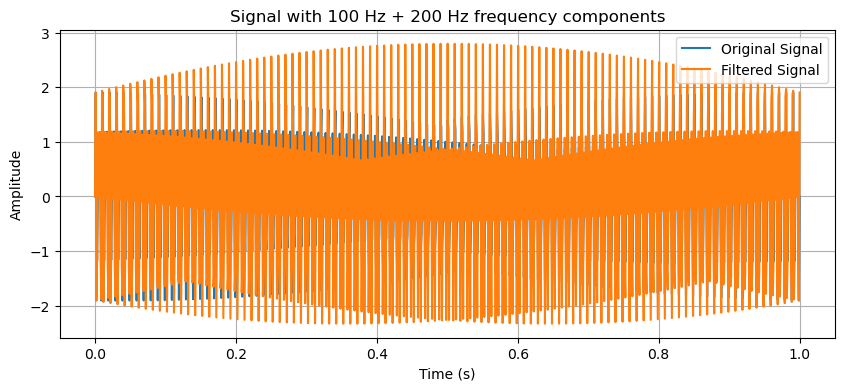

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
sampling_rate = 1000  # Sample rate in Hz
duration = 1  # Duration of the signal in seconds
t = np.linspace(0, duration, int(sampling_rate * duration))  # Time vector
amplitude = 1  # Amplitude of the signal
f1 = 100  # Frequency component 1 in Hz
f2 = 200  # Frequency component 2 in Hz

# Generate the signal
signal = amplitude * (np.sin(2 * np.pi * (f1 + f2) * t) +
                     np.sin(2 * np.pi * f2 * t))

# Define the filter coefficients
filter_coeffs = np.array([1, -1])

# Apply the filter
filtered_signal = np.convolve(signal, filter_coeffs, mode='same')

# Plotting the signals
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with 100 Hz + 200 Hz frequency components')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
print(filter_coeffs)

[ 1 -1]


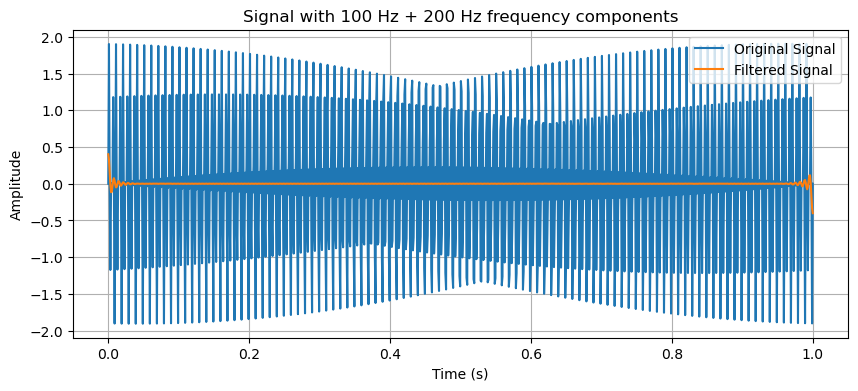

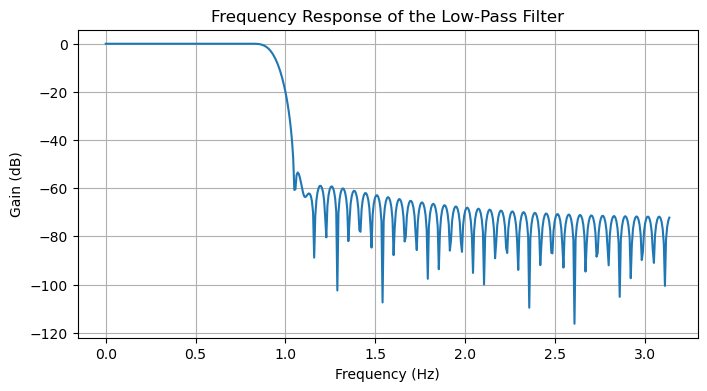

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Define the parameters
sampling_rate = 1000  # Sample rate in Hz
duration = 1  # Duration of the signal in seconds
t = np.linspace(0, duration, int(sampling_rate * duration))  # Time vector
amplitude = 1  # Amplitude of the signal
f1 = 100  # Frequency component 1 in Hz
f2 = 200  # Frequency component 2 in Hz
cutoff_frequency = 150  # Cutoff frequency for the low-pass filter in Hz

# Generate the signal
signal = amplitude * (np.sin(2 * np.pi * (f1 + f2) * t) +
                     np.sin(2 * np.pi * f2 * t))

# Design the low-pass filter coefficients
filter_order = 101  # Filter order
nyquist_frequency = 0.5 * sampling_rate
normalized_cutoff = cutoff_frequency / nyquist_frequency
filter_coeffs = firwin(filter_order, normalized_cutoff)

# Apply the filter
filtered_signal = np.convolve(signal, filter_coeffs, mode='same')

# Plotting the signals
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with 100 Hz + 200 Hz frequency components')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the frequency response of the filter
w, h = freqz(filter_coeffs)
frequency_response = 20 * np.log10(abs(h))
plt.figure(figsize=(8, 4))
plt.plot(w, frequency_response)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Frequency Response of the Low-Pass Filter')
plt.grid(True)
plt.show()


In [6]:
print(filter_coeffs)
print(len(filter_coeffs))

[ 2.74228046e-18  4.24795630e-04  5.26916056e-04  1.84299814e-04
 -3.83795110e-04 -7.24434743e-04 -4.77073453e-04  2.82872952e-04
  9.85792872e-04  9.51322584e-04 -1.96104560e-18 -1.22409505e-03
 -1.62897686e-03 -5.97861796e-04  1.28133732e-03  2.44968755e-03
  1.61363602e-03 -9.48114856e-04 -3.25253532e-03 -3.07612115e-03
  4.64817473e-18  3.77565728e-03  4.90168927e-03  1.75552297e-03
 -3.67446161e-03 -6.86882331e-03 -4.43056876e-03  2.55347985e-03
  8.60839357e-03  8.01693706e-03 -7.96964899e-18 -9.60473598e-03
 -1.23639349e-02 -4.40243332e-03  9.18787672e-03  1.71801401e-02
  1.11243935e-02 -6.46217463e-03 -2.20609031e-02 -2.09190939e-02
  1.06567781e-17  2.65383904e-02  3.56535822e-02  1.34236600e-02
 -3.01464034e-02 -6.21683204e-02 -4.60537692e-02  3.24890218e-02
  1.50669994e-01  2.57034754e-01  2.99708956e-01  2.57034754e-01
  1.50669994e-01  3.24890218e-02 -4.60537692e-02 -6.21683204e-02
 -3.01464034e-02  1.34236600e-02  3.56535822e-02  2.65383904e-02
  1.06567781e-17 -2.09190

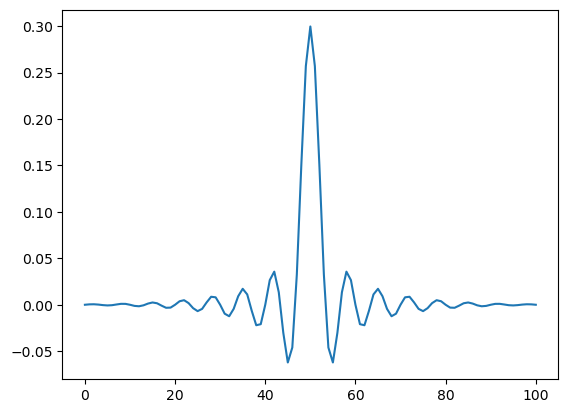

In [7]:
plt.plot(filter_coeffs)

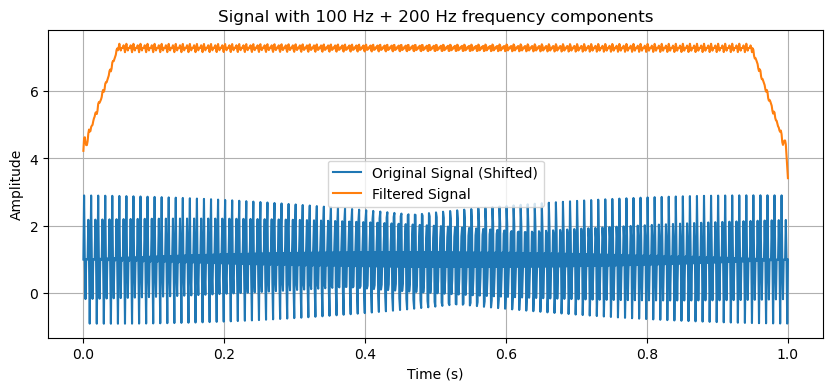

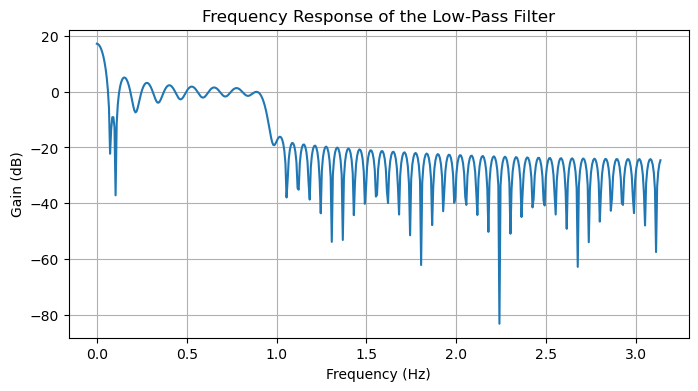

In [1]:
 import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Define the parameters
sampling_rate = 1000  # Sample rate in Hz
duration = 1  # Duration of the signal in seconds
t = np.linspace(0, duration, int(sampling_rate * duration))  # Time vector
amplitude = 1  # Amplitude of the signal
f1 = 100  # Frequency component 1 in Hz
f2 = 200  # Frequency component 2 in Hz
cutoff_frequency = 150  # Cutoff frequency for the low-pass filter in Hz

# Generate the signal
signal = amplitude * (np.sin(2 * np.pi * (f1 + f2) * t) +
                     np.sin(2 * np.pi * f2 * t))
signal_shifted = signal + amplitude  # Shift the signal above 0

# Design the low-pass filter coefficients
filter_order = 101  # Filter order
nyquist_frequency = 0.5 * sampling_rate
normalized_cutoff = cutoff_frequency / nyquist_frequency
filter_coeffs = firwin(filter_order, normalized_cutoff)
filter_coeffs_shifted = filter_coeffs + np.abs(np.min(filter_coeffs))  # Shift the coefficients above 0

# Apply the filter
filtered_signal = np.convolve(signal_shifted, filter_coeffs_shifted, mode='same')

# Plotting the signals
plt.figure(figsize=(10, 4))
plt.plot(t, signal_shifted, label='Original Signal (Shifted)')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with 100 Hz + 200 Hz frequency components')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the frequency response of the filter
w, h = freqz(filter_coeffs_shifted)
frequency_response = 20 * np.log10(abs(h))
plt.figure(figsize=(8, 4))
plt.plot(w, frequency_response)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Frequency Response of the Low-Pass Filter')
plt.grid(True)
plt.show()


In [ ]:
# adding few lines to see if gitignore works